
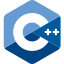
<br>

<div style="text-align:center; font-size:200%;">
 <b>Klassen-Templates</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 01 Klassen-Templates.ipynb -->
<!-- slides/module_400_templates/topic_130_class_templates.cpp -->


- Templates erlauben es, Klassen zu definieren, die von einem Typ abhängen
- Beispiel: `std::vector<T>`
  - `T` ist der Typ der Elemente im Vektor
  - `std::vector<int>` ist ein Vektor von `int`s
- Für jeden Typ, den wir für `T` einsetzen, wird eine neue Vektor-Klasse
  erzeugt
- Wir können solche Klassen selbst definieren
- Dazu verwenden wir das Schlüsselwort `template`, gefolgt von einer
  Template-Parameter-Liste

In [ ]:
template <typename T>
struct BufferV1
{
    T data[10];

    T& operator[](int index) { return data[index]; }

    void add(T value)
    {
        for (T& v : data) {
            v += value;
        }
    }
};


## Template-Parameter

- `T` ist ein Template-Parameter (genauer: Typ-Template-Parameter)
- `T` kann in der Klasse wie ein Typ verwendet werden
- Beim Instanziieren der Klasse wird `T` durch einen konkreten Typ ersetzt

In [ ]:
BufferV1<int> ib;

In [ ]:
ib[0] = 42;

In [ ]:
ib[0]

In [ ]:
ib.add(1);

In [ ]:
ib[0]

In [ ]:
BufferV1<std::string> sb;

In [ ]:
sb[0] = "Hello";

In [ ]:
sb[0]

In [ ]:
sb.add(" World");

In [ ]:
sb[0]


- Das Instanziieren einer Template-Klasse funktioniert nur, wenn die aufgerufenen
  Methoden für den konkreten Typ `T` definiert sind:

In [ ]:
#include <vector>

In [ ]:
BufferV1<std::vector<int>> bvi;

In [ ]:
bvi[0] = {1, 2, 3};

In [ ]:
bvi[0]

In [ ]:
// bvi.add({4, 5, 6});


## Template-Spezialisierung

- Wir können eine Template-Klasse für bestimmte Typen spezialisieren

In [ ]:
template <typename T>
struct BufferV2
{
    T data[10];

    T& operator[](std::size_t index) { return data[index]; }

    void add(T value)
    {
        for (T& v : data) {
            v += value;
        }
    }
};

In [ ]:
template <>
struct BufferV2<std::vector<int>>
{
    std::vector<int> data[10];

    std::vector<int>& operator[](std::size_t index) { return data[index]; }

    void add(std::vector<int> value)
    {
        for (std::vector<int>& v : data) {
            v.insert(v.end(), value.begin(), value.end());
        }
    }

};

In [ ]:
BufferV2<std::vector<int>> bvi2;

In [ ]:
bvi2[0] = {1, 2, 3};

In [ ]:
bvi2[0]

In [ ]:
bvi2.add({4, 5, 6});

In [ ]:
bvi2[0]

In [ ]:
bvi2[1]


## Partielle Spezialisierung

- Wir haben `BufferV2` für `std::vector<int>` spezialisiert
- Oft wäre es besser, wenn wir die Spezialisierung für `std::vector<T>`
  durchführen könnten
- Das ist mit partieller Spezialisierung möglich:

In [ ]:
template <typename T>
struct BufferV3
{
    T data[10];

    T& operator[](std::size_t index) { return data[index]; }

    void add(T value)
    {
        for (T& v : data) {
            v += value;
        }
    }
};

In [ ]:
template <typename T>
struct BufferV3<std::vector<T>>
{
    std::vector<T> data[10];

    std::vector<T>& operator[](std::size_t index) { return data[index]; }

    void add(std::vector<T> value)
    {
        for (std::vector<T>& v : data) {
            v.insert(v.end(), value.begin(), value.end());
        }
    }

};

In [ ]:
BufferV3<std::vector<std::string>> bvs;

In [ ]:
bvs[0] = {"a", "b", "c"};

In [ ]:
bvs[0]

In [ ]:
bvs.add({"d", "e", "f"});

In [ ]:
bvs[0]

In [ ]:
bvs[1]


- Template-Parameter können auch Werte sein
- Sie können dann wie Konstanten verwendet werden
- Beispiel: `std::array<T, N>`
  - `T` ist der Typ der Elemente im Array
  - `N` ist die Anzahl der Elemente im Array
- Für jeden Typ, den wir für `T` und jede Zahl, die wir für `N` einsetzen,
  wird eine neue Array-Klasse erzeugt

In [ ]:
template <typename T, int N>
struct BufferV4
{
    T data[N];

    T& operator[](std::size_t index) { return data[index]; }

    void add(T value)
    {
        for (T& v : data) {
            v += value;
        }
    }

    int size() const { return N; }
};

In [ ]:
BufferV4<int, 10> ib4;

In [ ]:
ib4.size()

In [ ]:
BufferV4<int, 20> ib5;

In [ ]:
ib5.size()


- Wir können die Werte von Template-Parametern auch berechnen
- Die Berechnung muss zur Compile-Zeit erfolgen
- Dazu verwenden wir `constexpr`-Funktionen

In [ ]:
constexpr int square(int x)
{
    return x * x;
}

In [ ]:
BufferV4<int, square(10)> ib6;

In [ ]:
ib6.size()